In [1]:
import pandas as pd

In [2]:
df_last = pd.read_csv('data/주택도시보증공사_전국 평균 분양가격(2019년 12월).csv', encoding='cp949')
df_last.shape

(4335, 5)

In [3]:
df_last.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [4]:
df_first = pd.read_csv('data/전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv', encoding='cp949')
df_first.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,...,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [5]:
# Summarize the data
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      4335 non-null   object
 1   규모구분     4335 non-null   object
 2   연도       4335 non-null   int64 
 3   월        4335 non-null   int64 
 4   분양가격(㎡)  4058 non-null   object
dtypes: int64(2), object(3)
memory usage: 169.5+ KB


In [6]:
# Check the null values in the data
df_last.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    277
dtype: int64

In [7]:
# Another method to check the null values
df_last.isna().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    277
dtype: int64

In [8]:
# Convert object type to integer type (* nan is float type)
df_last['분양가격'] = pd.to_numeric(df_last['분양가격(㎡)'], errors='coerce')
df_last['분양가격'].head()

0    5841.0
1    5652.0
2    5882.0
3    5721.0
4    5879.0
Name: 분양가격, dtype: float64

In [9]:
# Create a column for sale price per a squere meter
df_last['평당분양가격'] = df_last['분양가격'] * 3.3
df_last.head(1)

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,전체,2015,10,5841,5841.0,19275.3


In [10]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      4335 non-null   object 
 1   규모구분     4335 non-null   object 
 2   연도       4335 non-null   int64  
 3   월        4335 non-null   int64  
 4   분양가격(㎡)  4058 non-null   object 
 5   분양가격     3957 non-null   float64
 6   평당분양가격   3957 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 237.2+ KB


In [11]:
# Summarize the object type column
df_last['분양가격(㎡)'].describe()

count     4058
unique    1753
top       2221
freq        17
Name: 분양가격(㎡), dtype: object

In [12]:
# Summarize the numeric type column
df_last['분양가격'].describe()

count     3957.000000
mean      3238.128633
std       1264.309933
min       1868.000000
25%       2441.000000
50%       2874.000000
75%       3561.000000
max      12728.000000
Name: 분양가격, dtype: float64

In [13]:
# Change '규모구분' (Scale Classification) to '전용면적' (Area for exclusive use)
print(df_last['규모구분'].unique())
df_last['전용면적'] = df_last['규모구분'].str.replace('전용면적', '')
df_last['전용면적'] = df_last['전용면적'].str.replace('초과', '~')
df_last['전용면적'] = df_last['전용면적'].str.replace('이하', '')
df_last['전용면적'] = df_last['전용면적'].str.replace(' ', '')
df_last['전용면적']

['전체' '전용면적 60㎡이하' '전용면적 60㎡초과 85㎡이하' '전용면적 85㎡초과 102㎡이하' '전용면적 102㎡초과']


0             전체
1            60㎡
2        60㎡~85㎡
3       85㎡~102㎡
4          102㎡~
          ...   
4330          전체
4331         60㎡
4332     60㎡~85㎡
4333    85㎡~102㎡
4334       102㎡~
Name: 전용면적, Length: 4335, dtype: object

In [14]:
# Remove the space at the front and the rear
df_last['전용면적'] = df_last['전용면적'].str.strip()
df_last['전용면적']

0             전체
1            60㎡
2        60㎡~85㎡
3       85㎡~102㎡
4          102㎡~
          ...   
4330          전체
4331         60㎡
4332     60㎡~85㎡
4333    85㎡~102㎡
4334       102㎡~
Name: 전용면적, Length: 4335, dtype: object

In [15]:
# Remove unnecessory columns (axis=0 -> row, axis=1 -> column)
df_last = df_last.drop(['규모구분', '분양가격(㎡)'], axis=1)
df_last.head()

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체
1,서울,2015,10,5652.0,18651.6,60㎡
2,서울,2015,10,5882.0,19410.6,60㎡~85㎡
3,서울,2015,10,5721.0,18879.3,85㎡~102㎡
4,서울,2015,10,5879.0,19400.7,102㎡~


In [16]:
df_last.groupby(['지역명'])['평당분양가격'].mean()

지역명
강원     7890.750000
경기    13356.895200
경남     9268.778138
경북     8376.536515
광주     9951.535821
대구    11980.895455
대전    10253.333333
부산    12087.121200
서울    23599.976400
세종     9796.516456
울산    10014.902013
인천    11915.320732
전남     7565.316532
전북     7724.235484
제주    11241.276712
충남     8233.651883
충북     7634.655600
Name: 평당분양가격, dtype: float64

In [17]:
df_last.groupby(['전용면적'])['평당분양가격'].mean()

전용면적
102㎡~       11517.705634
60㎡         10375.137421
60㎡~85㎡     10271.040071
85㎡~102㎡    11097.599573
전체          10276.086207
Name: 평당분양가격, dtype: float64

In [18]:
df_last.groupby(['전용면적', '지역명'])['평당분양가격'].mean().unstack().round()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
102㎡~,8311.0,14772.0,10358.0,9157.0,11042.0,13087.0,14877.0,13208.0,23446.0,10107.0,9974.0,14362.0,8168.0,8194.0,10523.0,8689.0,8195.0
60㎡,7567.0,13252.0,8689.0,7883.0,9431.0,11992.0,9176.0,11354.0,23213.0,9324.0,9202.0,11241.0,7210.0,7610.0,14022.0,7911.0,7103.0
60㎡~85㎡,7486.0,12524.0,8619.0,8061.0,9911.0,11779.0,9711.0,11865.0,22787.0,9775.0,10503.0,11384.0,7269.0,7271.0,10621.0,7819.0,7264.0
85㎡~102㎡,8750.0,13678.0,10018.0,8774.0,9296.0,11141.0,9037.0,12073.0,25944.0,9848.0,8861.0,11528.0,7909.0,8276.0,10709.0,9120.0,8391.0
전체,7478.0,12560.0,8659.0,8079.0,9904.0,11771.0,9786.0,11936.0,22610.0,9805.0,10493.0,11257.0,7284.0,7293.0,10785.0,7815.0,7219.0


In [19]:
g = df_last.groupby(['연도', '지역명'])['평당분양가격'].mean()
g
# g.unstack().transpose()

연도    지역명
2015  강원      7188.060000
      경기     11060.940000
      경남      8459.220000
      경북      7464.160000
      광주      7916.700000
                 ...     
2019  전남      8219.275862
      전북      8532.260000
      제주     11828.469231
      충남      8748.840000
      충북      7970.875000
Name: 평당분양가격, Length: 85, dtype: float64

In [20]:
pd.pivot_table(df_last, index=['지역명'], values=['평당분양가격'], aggfunc='mean')

,평당분양가격
지역명,
강원,7890.750000
경기,13356.895200
경남,9268.778138
경북,8376.536515
광주,9951.535821
대구,11980.895455
대전,10253.333333
부산,12087.121200
서울,23599.976400


In [21]:
pd.pivot_table(df_last, index='전용면적', values='평당분양가격')

,평당분양가격
전용면적,
102㎡~,11517.705634
60㎡,10375.137421
60㎡~85㎡,10271.040071
85㎡~102㎡,11097.599573
전체,10276.086207


In [22]:
df_last.pivot_table(index=['전용면적', '지역명'], values='평당분양가격')

평당분양가격
전용면적  지역명              
102㎡~ 강원    8311.380000
      경기   14771.790000
      경남   10358.363265
      경북    9157.302000
      광주   11041.532432
...                 ...
전체    전남    7283.562000
      전북    7292.604000
      제주   10784.994000
      충남    7815.324000
      충북    7219.014000

[85 rows x 1 columns]

In [23]:
df_last.pivot_table(index='전용면적', columns='지역명', values='평당분양가격').round()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
102㎡~,8311.0,14772.0,10358.0,9157.0,11042.0,13087.0,14877.0,13208.0,23446.0,10107.0,9974.0,14362.0,8168.0,8194.0,10523.0,8689.0,8195.0
60㎡,7567.0,13252.0,8689.0,7883.0,9431.0,11992.0,9176.0,11354.0,23213.0,9324.0,9202.0,11241.0,7210.0,7610.0,14022.0,7911.0,7103.0
60㎡~85㎡,7486.0,12524.0,8619.0,8061.0,9911.0,11779.0,9711.0,11865.0,22787.0,9775.0,10503.0,11384.0,7269.0,7271.0,10621.0,7819.0,7264.0
85㎡~102㎡,8750.0,13678.0,10018.0,8774.0,9296.0,11141.0,9037.0,12073.0,25944.0,9848.0,8861.0,11528.0,7909.0,8276.0,10709.0,9120.0,8391.0
전체,7478.0,12560.0,8659.0,8079.0,9904.0,11771.0,9786.0,11936.0,22610.0,9805.0,10493.0,11257.0,7284.0,7293.0,10785.0,7815.0,7219.0


In [24]:
p = df_last.pivot_table(index=['연도', '지역명'], values='평당분양가격')
p.loc[2018]

,평당분양가격
지역명,
강원,8219.255000
경기,14258.420000
경남,9327.670000
경북,8680.776923
광주,9526.953333
대구,12139.252632
대전,10234.106667
부산,12889.965000
서울,23202.245000


In [25]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.style.use(['fivethirtyeight','seaborn-deep'])

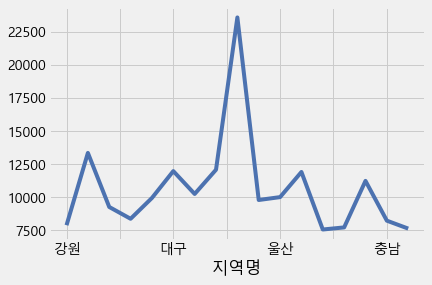

In [26]:
g = df_last.groupby(['지역명'])['평당분양가격'].mean()
g.plot()

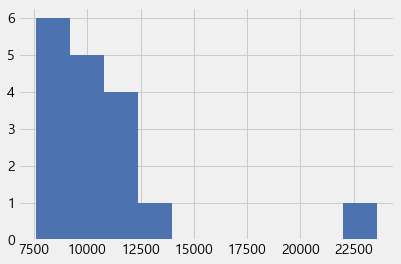

In [27]:
g.hist()

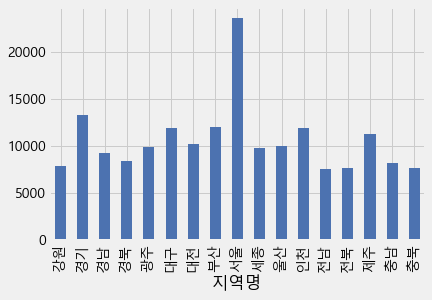

In [28]:
g.plot(kind='bar')

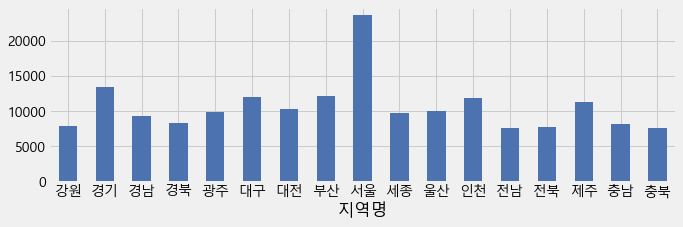

In [29]:
g.plot.bar(rot=0, figsize=(10, 3))

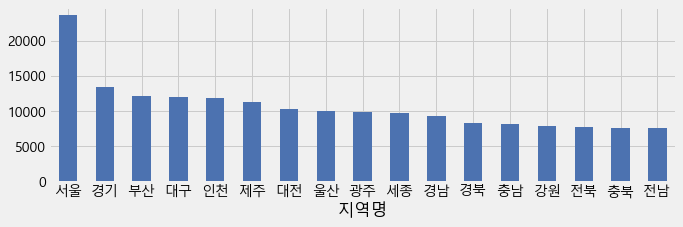

In [30]:
g.sort_values(ascending=False).plot.bar(rot=0, figsize=(10, 3))

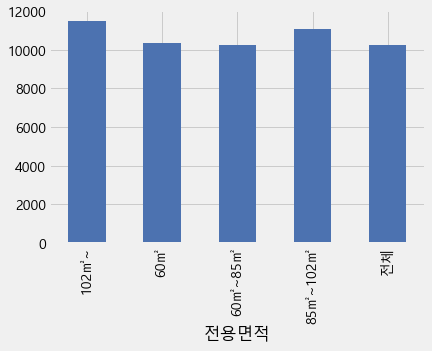

In [31]:
df_last.groupby(['전용면적'])['평당분양가격'].mean().plot.bar()

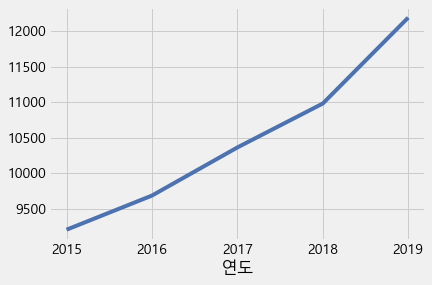

In [32]:
df_last.groupby(['연도'])['평당분양가격'].mean().plot()

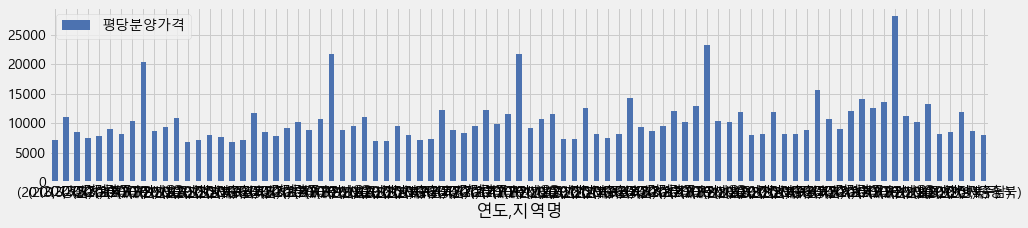

In [33]:
p.plot.bar(figsize=(15, 3), rot=0)

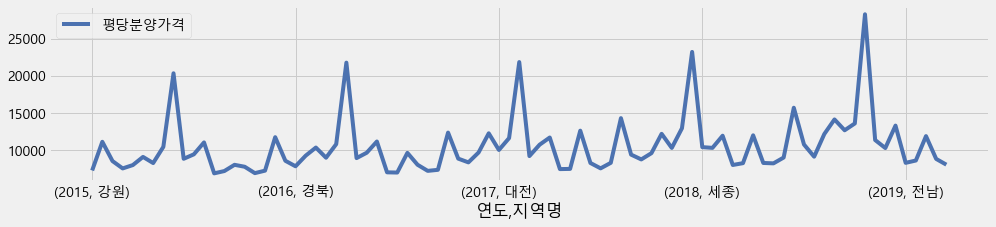

In [34]:
p.plot(figsize=(15, 3), rot=0)

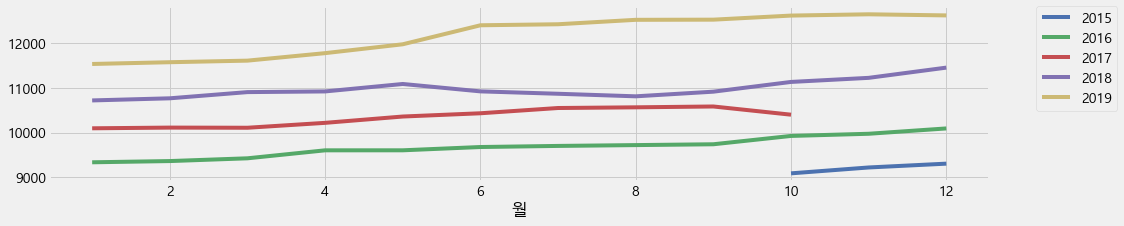

In [35]:
p = df_last.pivot_table(index='월', columns='연도', values='평당분양가격')
p.plot(figsize=(15, 3), rot=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

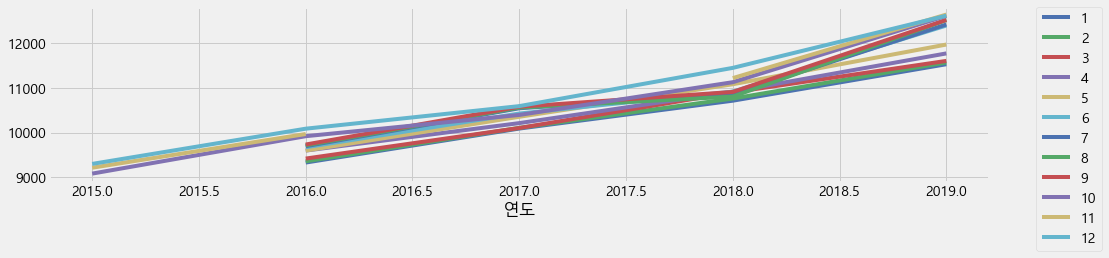

In [36]:
p = df_last.pivot_table(index='연도', columns='월', values='평당분양가격')
p.plot(figsize=(15, 3), rot=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

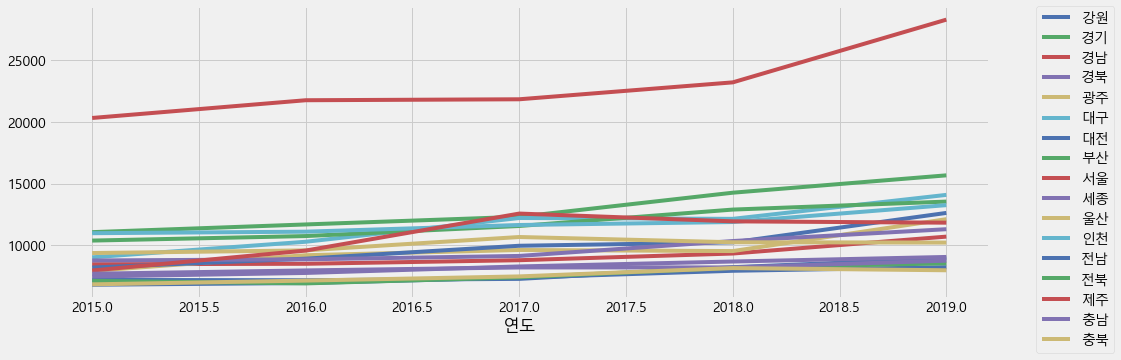

In [37]:
p = df_last.pivot_table(index='연도', columns='지역명', values='평당분양가격')
p.plot(figsize=(15, 5), rot=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [38]:
import seaborn as sns

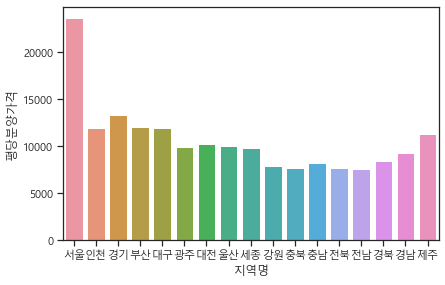

In [39]:
sns.set(font="Malgun Gothic", rc={"axes.unicode_minus":False},style='ticks')
sns.barplot(data=df_last, x='지역명', y='평당분양가격', ci=None)

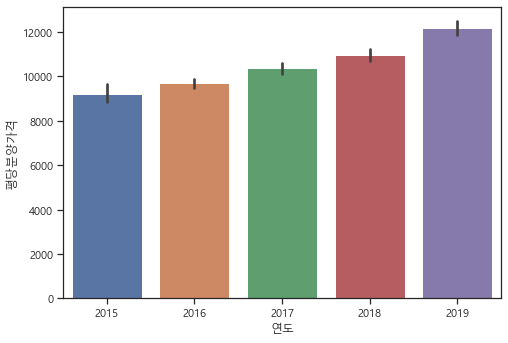

In [40]:
plt.figure(figsize=(7, 5))
sns.barplot(data=df_last, x='연도', y='평당분양가격')

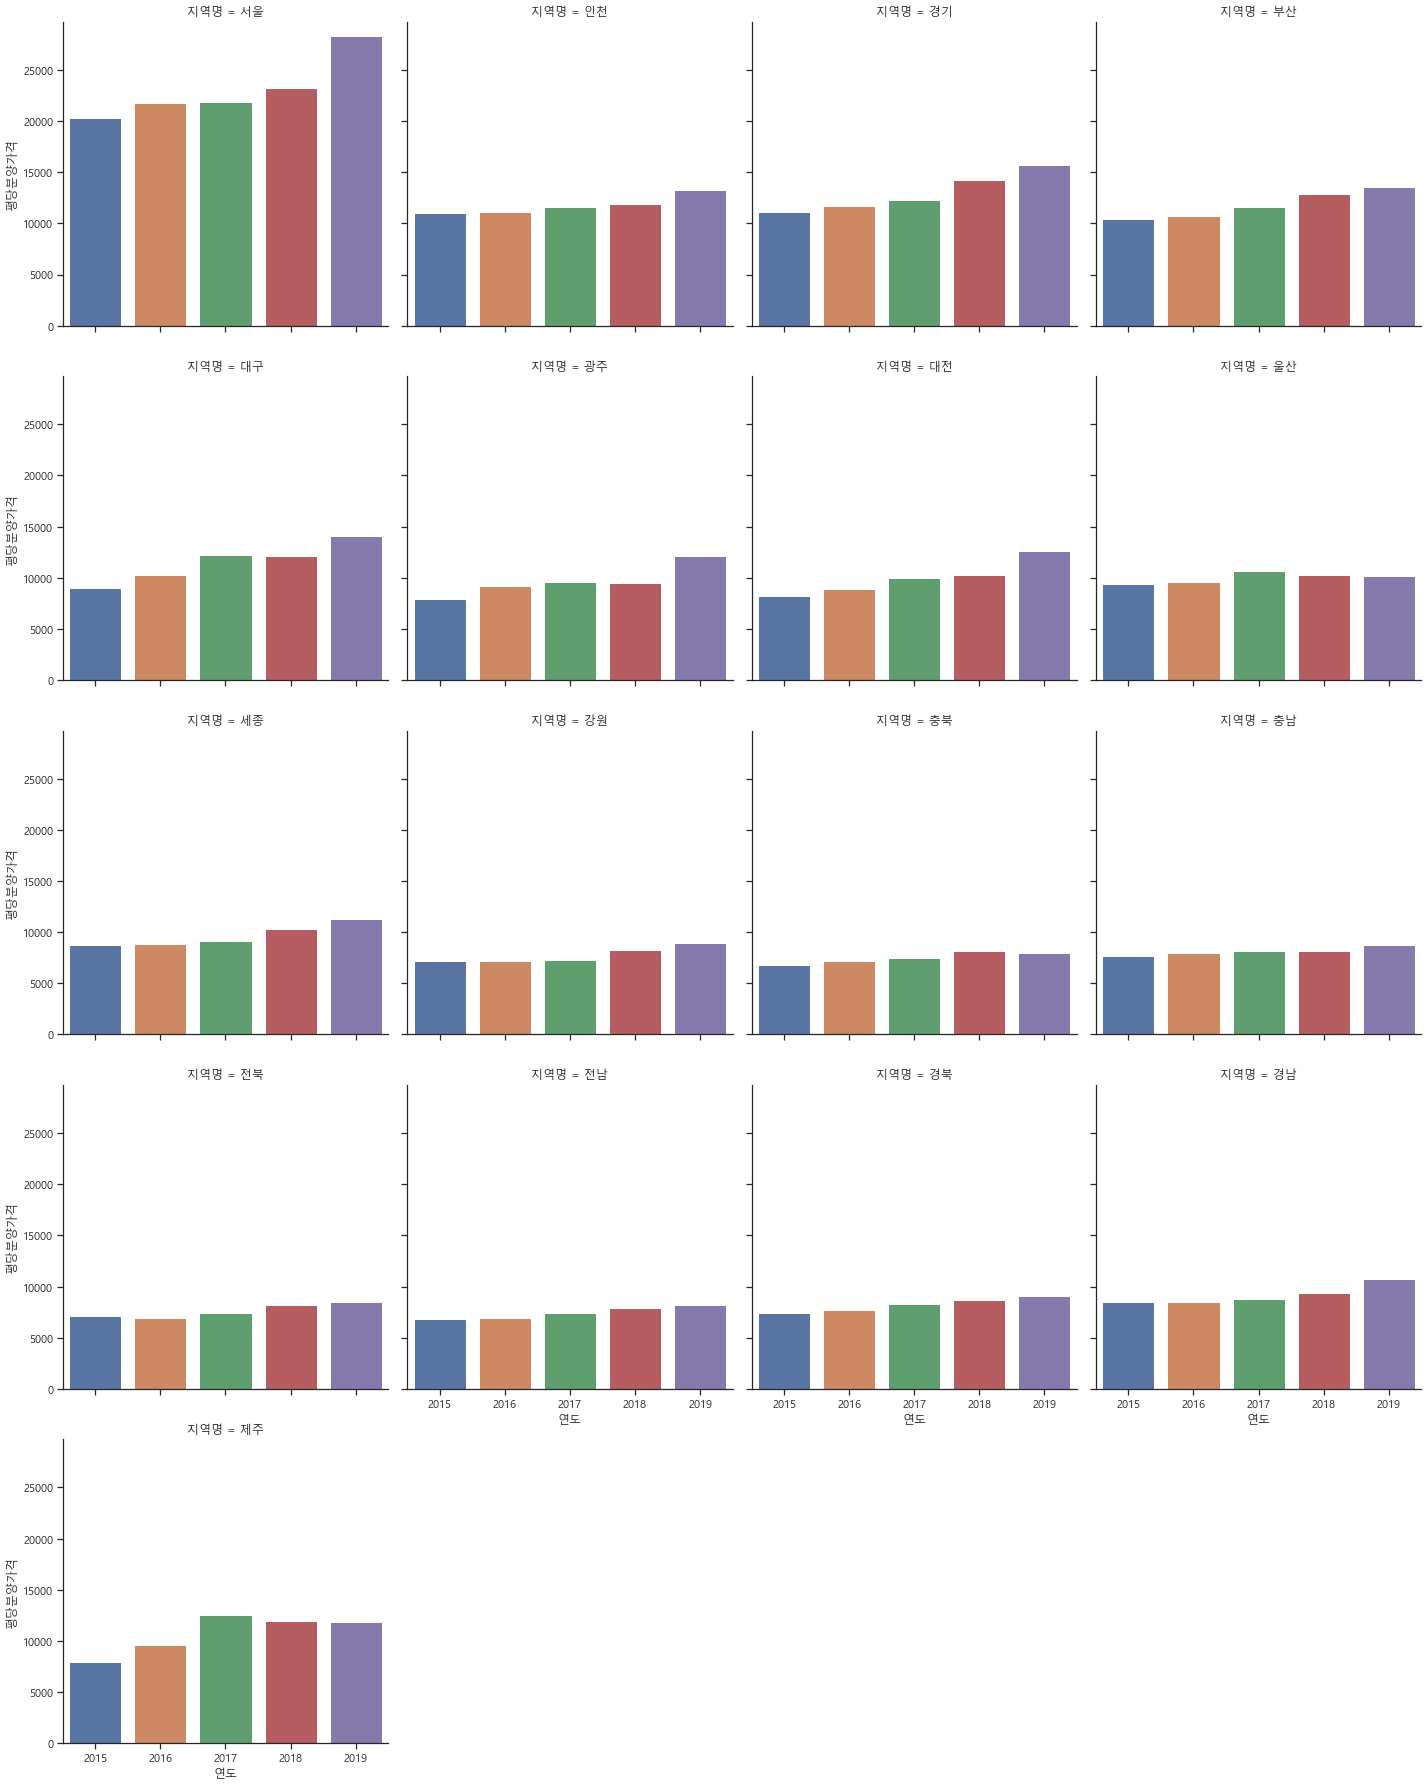

In [41]:
sns.catplot(data=df_last, x='연도', y='평당분양가격', kind='bar', col='지역명', col_wrap=4, ci=None)

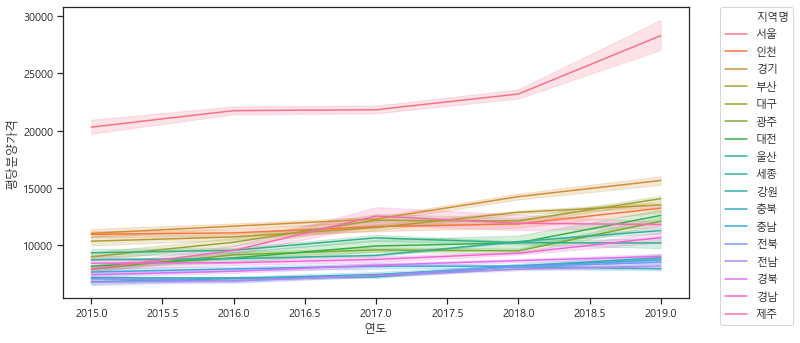

In [42]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_last, x='연도', y='평당분양가격', hue='지역명')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

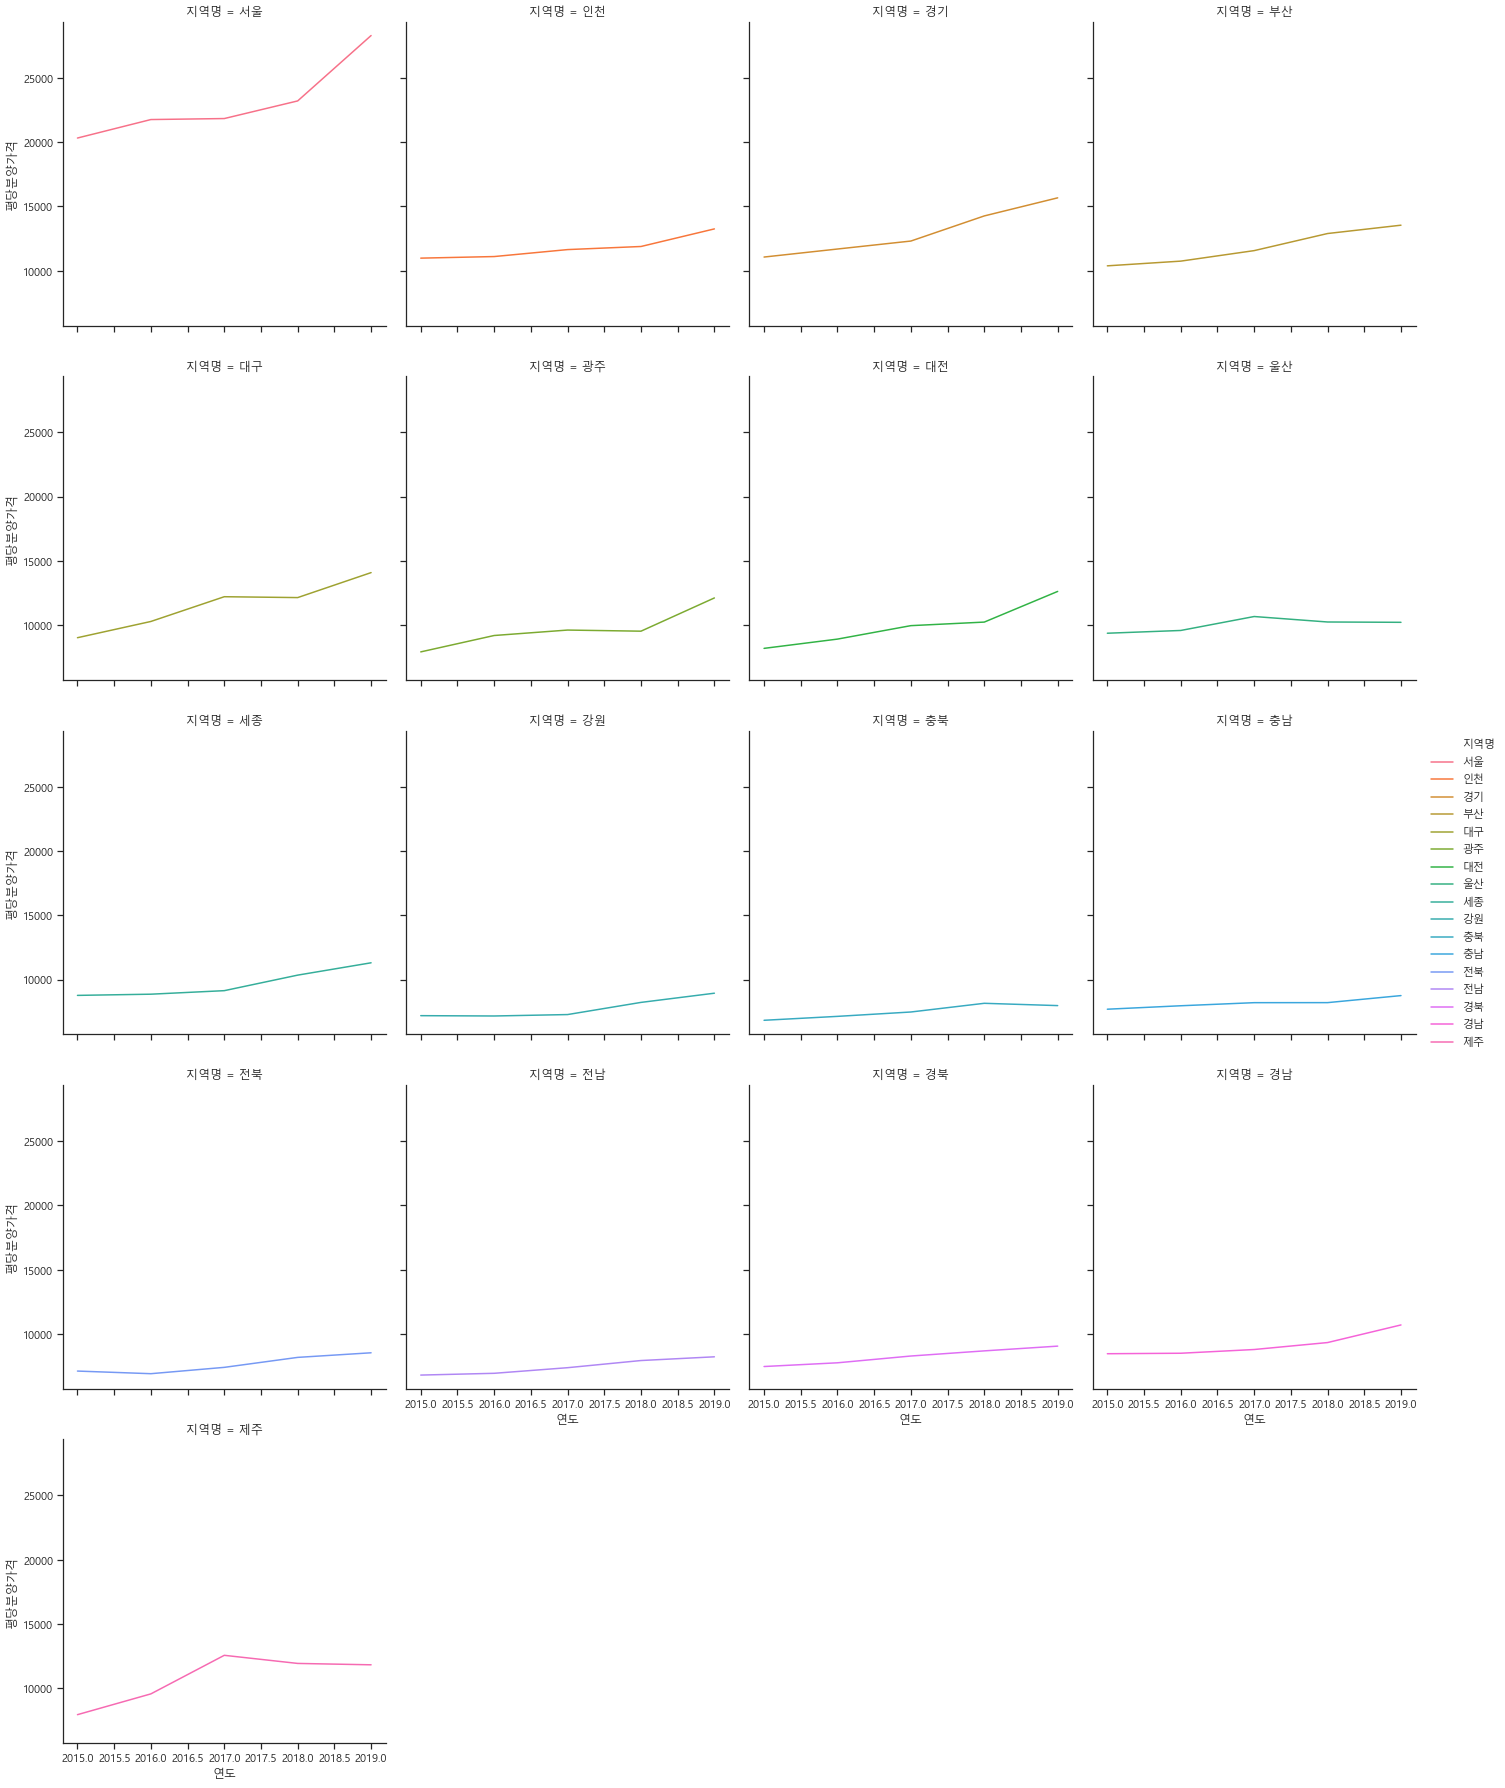

In [43]:
sns.relplot(data=df_last, x='연도', y='평당분양가격', hue='지역명', kind='line', col='지역명', col_wrap=4, ci=None)

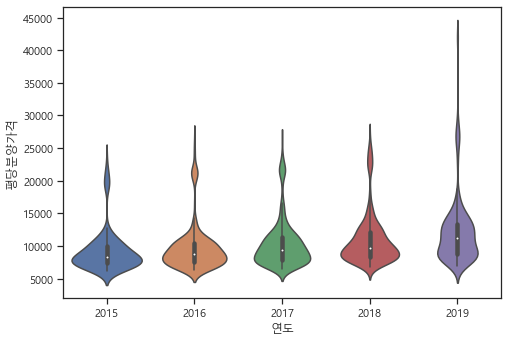

In [44]:
plt.figure(figsize=(7, 5))
sns.violinplot(data=df_last, x='연도', y='평당분양가격')

In [45]:
df_last['평당분양가격'].describe()

count     3957.000000
mean     10685.824488
std       4172.222780
min       6164.400000
25%       8055.300000
50%       9484.200000
75%      11751.300000
max      42002.400000
Name: 평당분양가격, dtype: float64

In [46]:
max_price  = df_last['평당분양가격'].max()
max_price

42002.399999999994

In [47]:
df_last[df_last['평당분양가격'] == max_price]

,지역명,연도,월,분양가격,평당분양가격,전용면적
3743,서울,2019,6,12728.0,42002.4,85㎡~102㎡
3828,서울,2019,7,12728.0,42002.4,85㎡~102㎡
3913,서울,2019,8,12728.0,42002.4,85㎡~102㎡
3998,서울,2019,9,12728.0,42002.4,85㎡~102㎡
4083,서울,2019,10,12728.0,42002.4,85㎡~102㎡
4168,서울,2019,11,12728.0,42002.4,85㎡~102㎡
4253,서울,2019,12,12728.0,42002.4,85㎡~102㎡


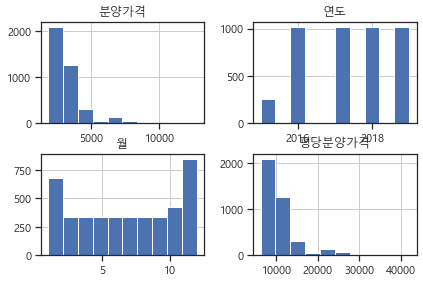

In [48]:
h = df_last.hist(bins=10)

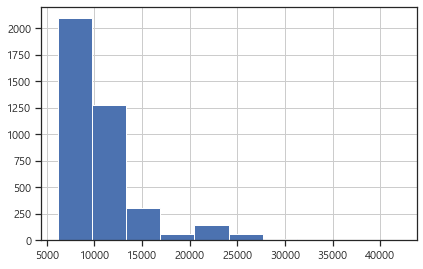

In [49]:
h = df_last['평당분양가격'].hist(bins=10)

In [50]:
# Get the data without null values
price = df_last.loc[df_last['평당분양가격'].notnull(), '평당분양가격']
price.head()

0    19275.3
1    18651.6
2    19410.6
3    18879.3
4    19400.7
Name: 평당분양가격, dtype: float64

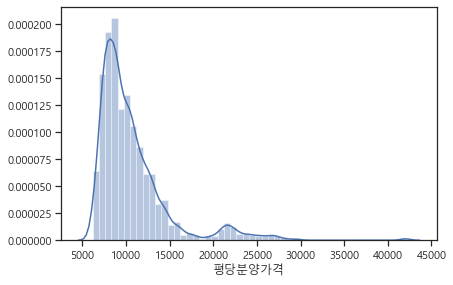

In [51]:
sns.distplot(price)

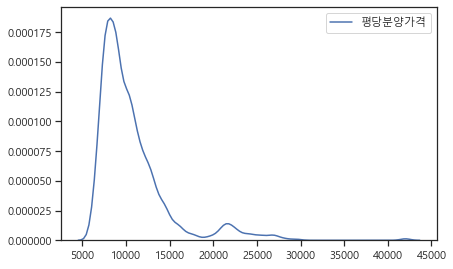

In [52]:
sns.kdeplot(price)

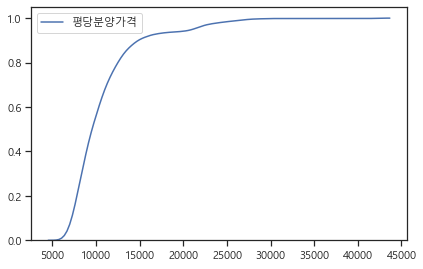

In [53]:
sns.kdeplot(price, cumulative=True)

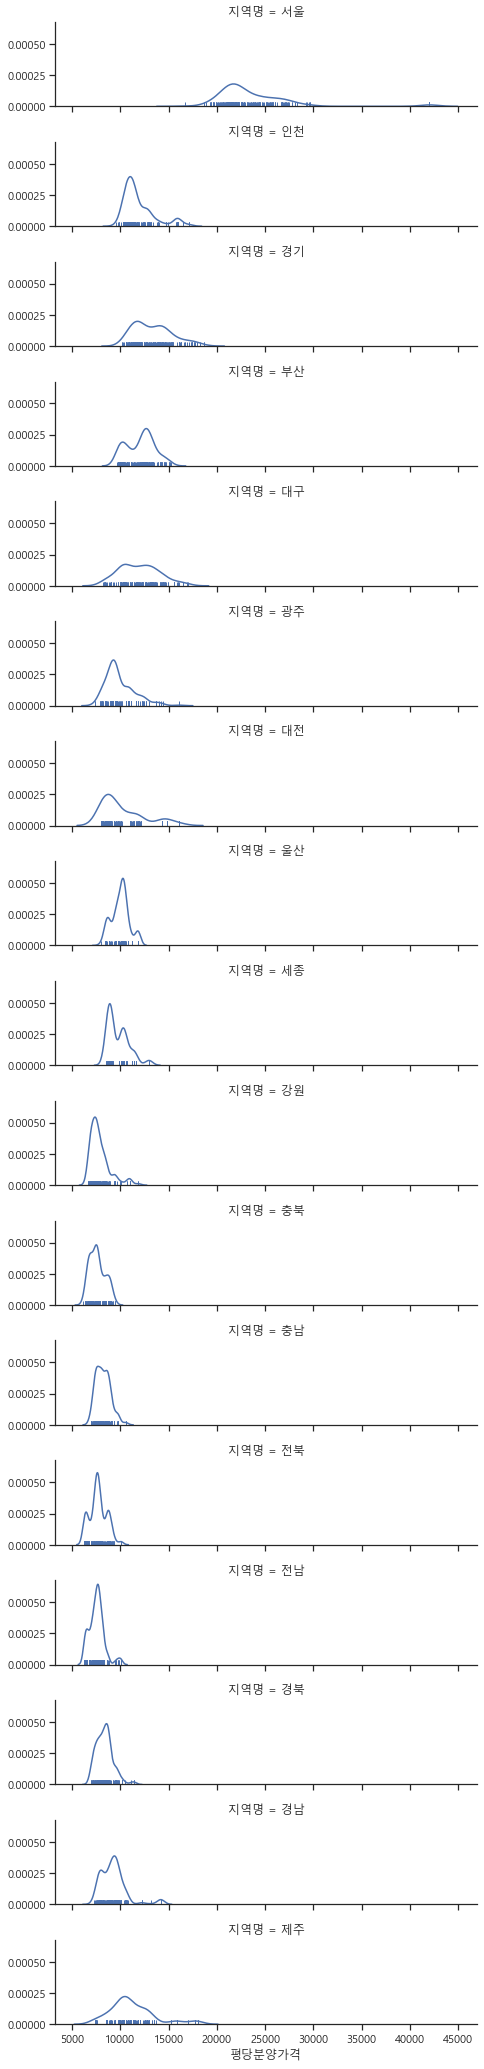

In [54]:
g = sns.FacetGrid(df_last, row='지역명', height=1.7, aspect=4)
g.map(sns.distplot, '평당분양가격', hist=False, rug=True)

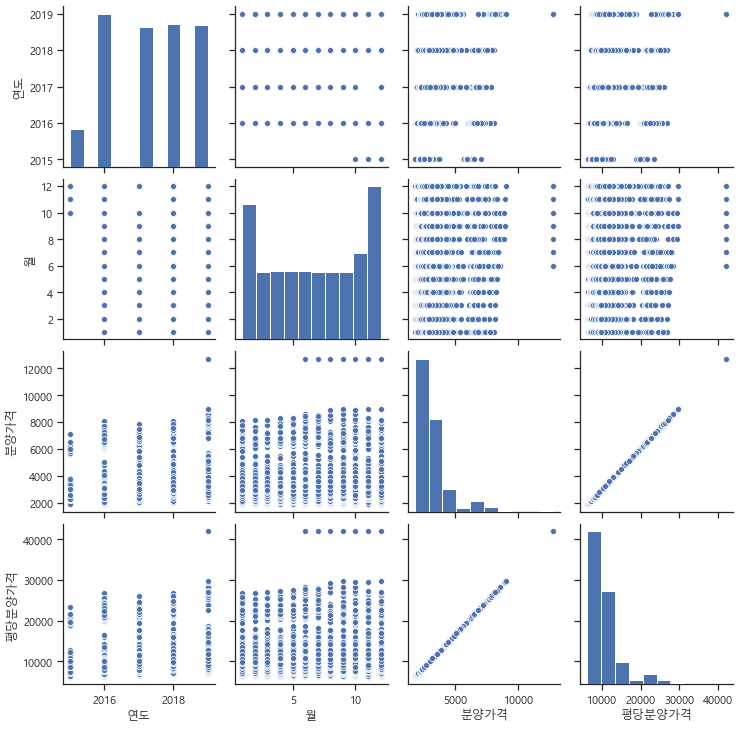

In [55]:
df_last_notnull = df_last[df_last['평당분양가격'].notnull()]
sns.pairplot(df_last_notnull)

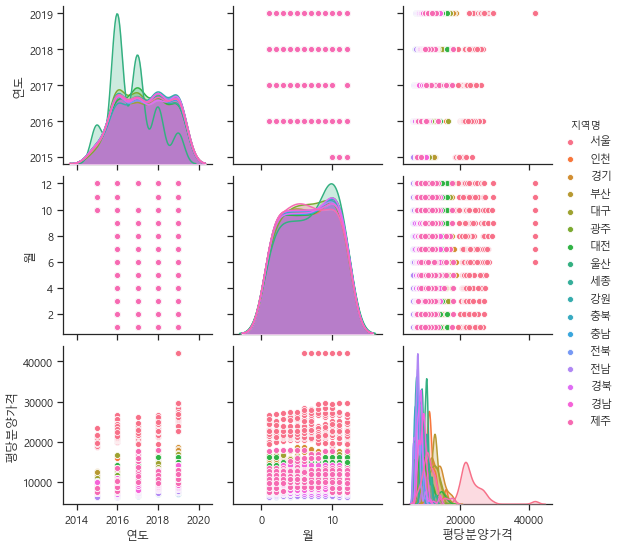

In [56]:
df_last_notnull_custom = df_last.loc[df_last['평당분양가격'].notnull(), ['연도', '월', '평당분양가격', '지역명', '전용면적']]
sns.pairplot(df_last_notnull_custom, hue='지역명')

In [57]:
df_last['전용면적'].value_counts()

전체          867
85㎡~102㎡    867
60㎡         867
102㎡~       867
60㎡~85㎡     867
Name: 전용면적, dtype: int64

In [58]:
# See more columns
pd.options.display.max_columns = 50

In [59]:
df_first

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,19404,19759,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,9258,9110,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,8449,8403,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,9973,10016,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,7802,7707,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231
5,대전,8321,8321,8321,8341,8341,8341,8333,8333,8333,8048,8038,8067,8067,8067,8067,8067,8145,8272,8079,8079,8079
6,울산,8090,8090,8090,8153,8153,8153,8153,8153,8493,8493,8627,8891,8891,8526,8526,8629,9380,9192,9190,9190,9215
7,경기,10855,10855,10791,10784,10876,10646,10266,10124,10134,10501,10397,10356,10379,10391,10355,10469,10684,10685,10573,10518,10573
8,세종,7601,7600,7532,7814,7908,7934,8067,8067,8141,8282,8527,8592,8560,8560,8560,8555,8546,8546,8671,8669,8695
9,강원,6230,6230,6230,6141,6373,6350,6350,6268,6268,6419,6631,6365,6365,6348,6350,6182,6924,6846,6986,7019,7008


In [60]:
df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   지역        17 non-null     object
 1   2013년12월  17 non-null     int64 
 2   2014년1월   17 non-null     int64 
 3   2014년2월   17 non-null     int64 
 4   2014년3월   17 non-null     int64 
 5   2014년4월   17 non-null     int64 
 6   2014년5월   17 non-null     int64 
 7   2014년6월   17 non-null     int64 
 8   2014년7월   17 non-null     int64 
 9   2014년8월   17 non-null     int64 
 10  2014년9월   17 non-null     int64 
 11  2014년10월  17 non-null     int64 
 12  2014년11월  17 non-null     int64 
 13  2014년12월  17 non-null     int64 
 14  2015년1월   17 non-null     int64 
 15  2015년2월   17 non-null     int64 
 16  2015년3월   17 non-null     int64 
 17  2015년4월   17 non-null     int64 
 18  2015년5월   17 non-null     int64 
 19  2015년6월   17 non-null     int64 
 20  2015년7월   17 non-null     int64 
 21  2015년8월   17 non-n

In [61]:
df_first.isnull().sum()

지역          0
2013년12월    0
2014년1월     0
2014년2월     0
2014년3월     0
2014년4월     0
2014년5월     0
2014년6월     0
2014년7월     0
2014년8월     0
2014년9월     0
2014년10월    0
2014년11월    0
2014년12월    0
2015년1월     0
2015년2월     0
2015년3월     0
2015년4월     0
2015년5월     0
2015년6월     0
2015년7월     0
2015년8월     0
dtype: int64

In [62]:
df_first_melt = df_first.melt(id_vars='지역', var_name='기간', value_name='평당분양가격')
df_first_melt.head()

,지역,기간,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098


In [63]:
# Change column's name
df_first_melt.columns = ['지역명', '기간', '평당분양가격']
df_first_melt.head()

,지역명,기간,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098


In [64]:
date = '2013년12월'
date

'2013년12월'

In [65]:
date.split('년')

['2013', '12월']

In [66]:
date.split('년')[1].replace('월', '')

'12'

In [67]:
def parse_year(date):
    year = date.split('년')[0]
    year = int(year)
    return year

In [68]:
parse_year(date)

2013

In [69]:
def parse_month(date):
    month = date.split('년')[1].replace('월', '')
    month = int(month)
    return month

In [70]:
parse_month(date)

12

In [71]:
df_first_melt['연도'] = df_first_melt['기간'].apply(parse_year)
df_first_melt['월'] = df_first_melt['기간'].apply(parse_month)
df_first_melt.head()

,지역명,기간,평당분양가격,연도,월
0,서울,2013년12월,18189,2013,12
1,부산,2013년12월,8111,2013,12
2,대구,2013년12월,8080,2013,12
3,인천,2013년12월,10204,2013,12
4,광주,2013년12월,6098,2013,12


In [72]:
# Preview the data
df_last.sample()

,지역명,연도,월,분양가격,평당분양가격,전용면적
1807,대구,2017,7,3887.0,12827.1,60㎡~85㎡


In [73]:
df_last.columns

Index(['지역명', '연도', '월', '분양가격', '평당분양가격', '전용면적'], dtype='object')

In [74]:
cols = ['지역명', '연도', '월', '평당분양가격']
cols

['지역명', '연도', '월', '평당분양가격']

In [75]:
df_last_prepare = df_last.loc[df_last['전용면적'] == '전체', cols].copy()
df_last_prepare.sample()

,지역명,연도,월,평당분양가격
1015,제주,2016,9,10173.9


In [76]:
df_first_prepare = df_first_melt[cols].copy()
df_first_prepare.sample()

,지역명,연도,월,평당분양가격
233,전북,2015,1,6583


In [77]:
# Concatenate two data
df = pd.concat([df_first_prepare, df_last_prepare])
df

,지역명,연도,월,평당분양가격
0,서울,2013,12,18189.0
1,부산,2013,12,8111.0
2,대구,2013,12,8080.0
3,인천,2013,12,10204.0
4,광주,2013,12,6098.0
...,...,...,...,...
4310,전북,2019,12,8144.4
4315,전남,2019,12,8091.6
4320,경북,2019,12,9616.2
4325,경남,2019,12,10107.9


In [78]:
df['연도'].value_counts(sort=False)

2013     17
2014    204
2015    187
2016    204
2017    204
2018    204
2019    204
Name: 연도, dtype: int64

In [79]:
t= pd.pivot_table(df, index='연도', columns='지역명', values='평당분양가격').round()
t

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2013,6230.0,10855.0,6473.0,6168.0,6098.0,8080.0,8321.0,8111.0,18189.0,7601.0,8090.0,10204.0,5678.0,6282.0,7674.0,6365.0,6589.0
2014,6332.0,10509.0,6729.0,6536.0,7588.0,8286.0,8240.0,9180.0,18997.0,8085.0,8362.0,10075.0,5719.0,6362.0,7855.0,6682.0,6620.0
2015,6831.0,10489.0,7646.0,7035.0,7956.0,8707.0,8105.0,9633.0,19283.0,8641.0,9273.0,10277.0,6109.0,6623.0,7465.0,7024.0,6700.0
2016,7011.0,11220.0,7848.0,7361.0,8899.0,10310.0,8502.0,10430.0,20663.0,8860.0,10209.0,10532.0,6489.0,6418.0,9129.0,7331.0,6770.0
2017,7127.0,11850.0,8120.0,7795.0,9464.0,11456.0,9045.0,11578.0,21376.0,9135.0,11345.0,10737.0,7188.0,7058.0,10831.0,7456.0,6763.0
2018,7681.0,13186.0,9019.0,8505.0,9856.0,12076.0,10180.0,12998.0,22889.0,10355.0,10241.0,11274.0,7789.0,7626.0,11891.0,8013.0,7874.0
2019,8142.0,14469.0,9871.0,8857.0,11823.0,13852.0,11778.0,13116.0,26131.0,11079.0,10022.0,12635.0,7902.0,8197.0,12138.0,8607.0,7575.0


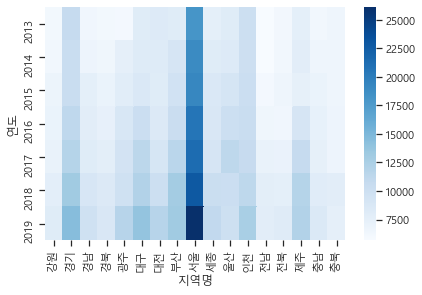

In [80]:
sns.heatmap(t, cmap='Blues')

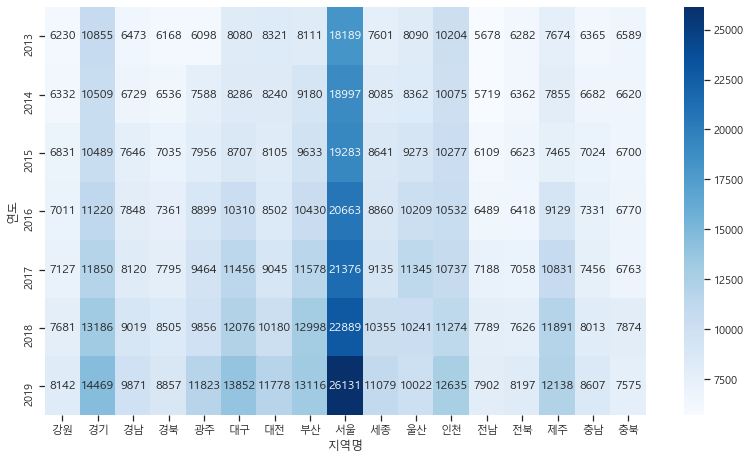

In [81]:
plt.figure(figsize=(12, 7))
sns.heatmap(t, cmap='Blues', annot=True, fmt='.0f')

In [82]:
t.T

연도,2013,2014,2015,2016,2017,2018,2019
지역명,,,,,,,
강원,6230.0,6332.0,6831.0,7011.0,7127.0,7681.0,8142.0
경기,10855.0,10509.0,10489.0,11220.0,11850.0,13186.0,14469.0
경남,6473.0,6729.0,7646.0,7848.0,8120.0,9019.0,9871.0
경북,6168.0,6536.0,7035.0,7361.0,7795.0,8505.0,8857.0
광주,6098.0,7588.0,7956.0,8899.0,9464.0,9856.0,11823.0
대구,8080.0,8286.0,8707.0,10310.0,11456.0,12076.0,13852.0
대전,8321.0,8240.0,8105.0,8502.0,9045.0,10180.0,11778.0
부산,8111.0,9180.0,9633.0,10430.0,11578.0,12998.0,13116.0
서울,18189.0,18997.0,19283.0,20663.0,21376.0,22889.0,26131.0


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5]),
 <a list of 17 Text major ticklabel objects>)

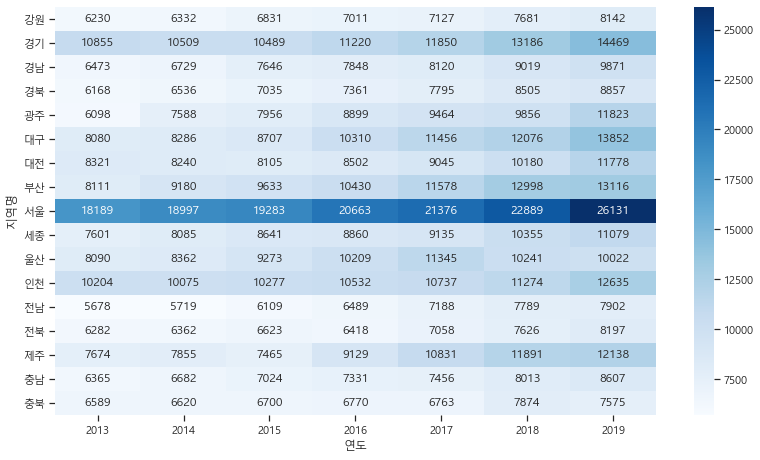

In [83]:
plt.figure(figsize=(12, 7))
sns.heatmap(t.T, cmap='Blues', annot=True, fmt='.0f')
plt.yticks(rotation=0)

In [84]:
g = df.groupby(['연도', '지역명'])['평당분양가격'].mean().unstack().round()
g

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2013,6230.0,10855.0,6473.0,6168.0,6098.0,8080.0,8321.0,8111.0,18189.0,7601.0,8090.0,10204.0,5678.0,6282.0,7674.0,6365.0,6589.0
2014,6332.0,10509.0,6729.0,6536.0,7588.0,8286.0,8240.0,9180.0,18997.0,8085.0,8362.0,10075.0,5719.0,6362.0,7855.0,6682.0,6620.0
2015,6831.0,10489.0,7646.0,7035.0,7956.0,8707.0,8105.0,9633.0,19283.0,8641.0,9273.0,10277.0,6109.0,6623.0,7465.0,7024.0,6700.0
2016,7011.0,11220.0,7848.0,7361.0,8899.0,10310.0,8502.0,10430.0,20663.0,8860.0,10209.0,10532.0,6489.0,6418.0,9129.0,7331.0,6770.0
2017,7127.0,11850.0,8120.0,7795.0,9464.0,11456.0,9045.0,11578.0,21376.0,9135.0,11345.0,10737.0,7188.0,7058.0,10831.0,7456.0,6763.0
2018,7681.0,13186.0,9019.0,8505.0,9856.0,12076.0,10180.0,12998.0,22889.0,10355.0,10241.0,11274.0,7789.0,7626.0,11891.0,8013.0,7874.0
2019,8142.0,14469.0,9871.0,8857.0,11823.0,13852.0,11778.0,13116.0,26131.0,11079.0,10022.0,12635.0,7902.0,8197.0,12138.0,8607.0,7575.0


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5]),
 <a list of 17 Text major ticklabel objects>)

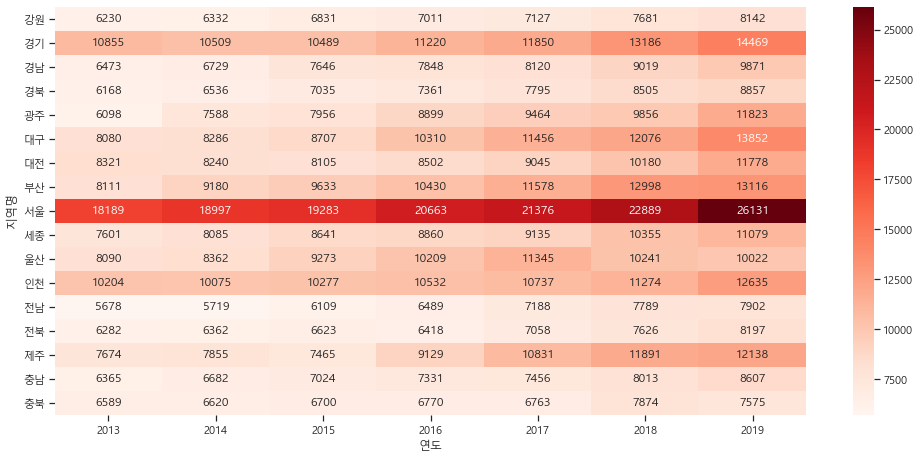

In [85]:
plt.figure(figsize=(15, 7))
sns.heatmap(g.T, annot=True, fmt='.0f', cmap='Reds')
plt.yticks(rotation=0)

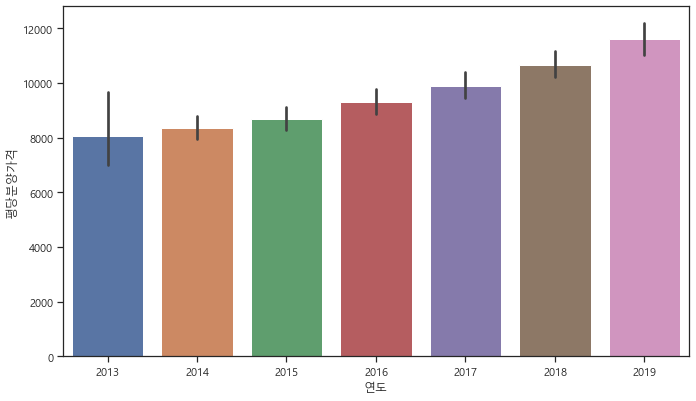

In [86]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='연도', y='평당분양가격')

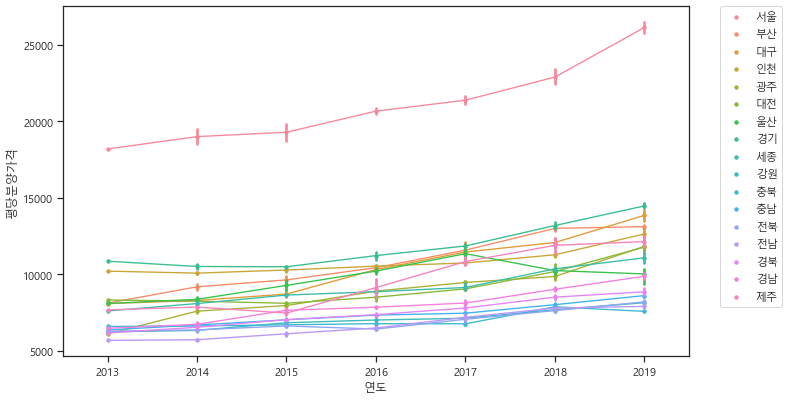

In [87]:
plt.figure(figsize=(10, 6))
sns.pointplot(data=df, x='연도', y='평당분양가격', hue='지역명', scale=.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

(72, 4)


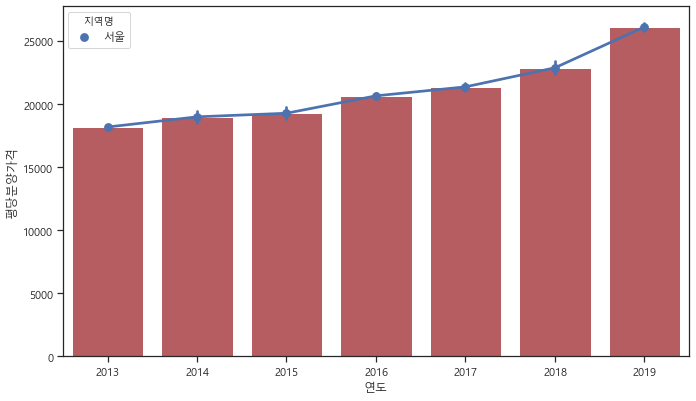

In [88]:
df_seoul = df[df['지역명'] == '서울'].copy()
print(df_seoul.shape)
plt.figure(figsize=(10, 6))
sns.barplot(data=df_seoul, x='연도', y='평당분양가격', color='r', ci=None, zorder=0)
sns.pointplot(data=df_seoul, x='연도', y='평당분양가격', hue='지역명', zorder=1)

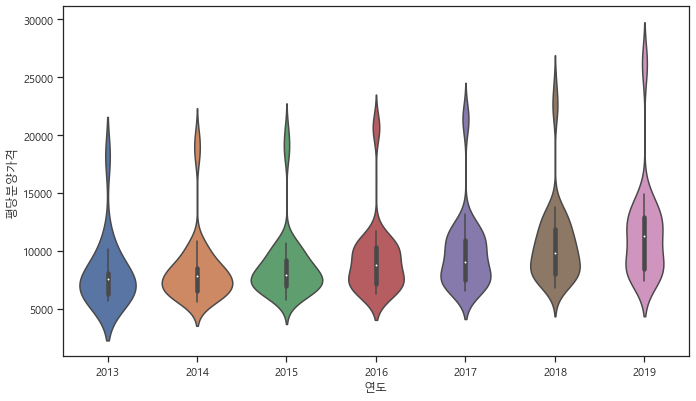

In [89]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='연도', y='평당분양가격')

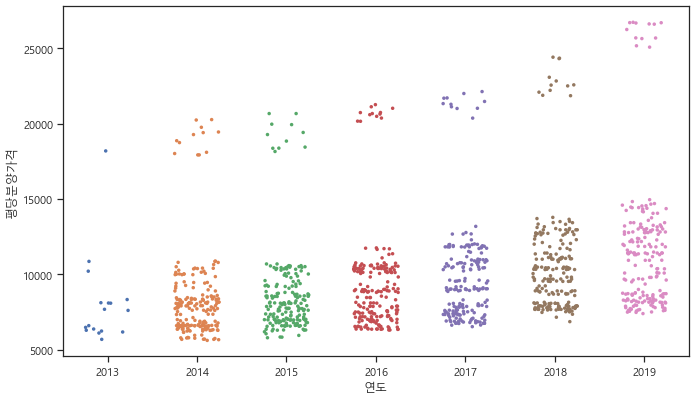

In [90]:
plt.figure(figsize=(10, 6))
sns.stripplot(data=df, x='연도', y='평당분양가격', size=3.5, jitter=.25)

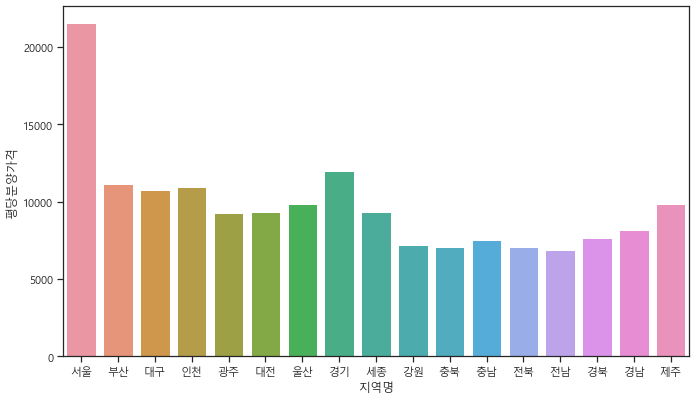

In [91]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='지역명', y='평당분양가격', ci=None)

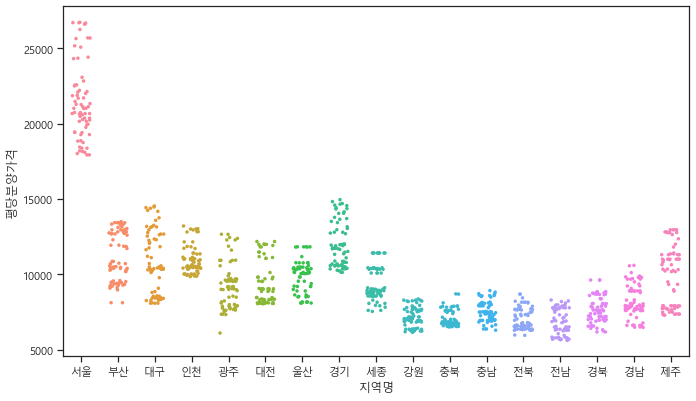

In [92]:
plt.figure(figsize=(10, 6))
sns.stripplot(data=df, x='지역명', y='평당분양가격', size=3.5, jitter=.25)